In [41]:
%matplotlib inline
import pandas as pd
import matplotlib
import time
import numpy as np
import matplotlib.pyplot as plt
TRADE_DATA = "../data/Trade.csv"

In [42]:
df_trade = pd.read_csv(TRADE_DATA)
df_trade.columns

Index(['TradeDateKey', 'CustomerIdx', 'IsinIdx', 'BuySell', 'NotionalEUR',
       'Price', 'TradeStatus', 'CustomerInterest'],
      dtype='object')

In [43]:
print("Overview")
print(df_trade.head(5))
print(df_trade.describe())

df_trade = df_trade[df_trade["TradeDateKey"] >= 20180101]

Overview
   TradeDateKey  CustomerIdx  IsinIdx BuySell  NotionalEUR  Price TradeStatus  \
0      20161207         2789     8478    Sell     653168.0    0.0     Unknown   
1      20170329         2574    14562     Buy    1656487.0    0.0     Unknown   
2      20170418         2574     4747     Buy     939673.0    0.0     Unknown   
3      20170310         2574     9885    Sell     708082.0    0.0     Unknown   
4      20161116         2574     8885     Buy    1147709.0    0.0     Unknown   

   CustomerInterest  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
       TradeDateKey   CustomerIdx       IsinIdx   NotionalEUR         Price  \
count  6.762021e+06  6.762021e+06  6.762021e+06  6.762021e+06  2.144088e+06   
mean   2.016750e+07  1.922354e+03  1.460369e+04  6.313228e+06  1.779008e+05   
std    6.768082e+03  8.579293e+02  7.963809e+03  2.712408e+08  1.318503e+06   
min    2.016010e+07  0.000000e+00  0.000000e+00 -1.48554

       CustomerIdx  TradeDateKey
count  2411.000000   2411.000000
mean   1750.467856    352.181667
std     994.239898   1367.384775
min       0.000000      1.000000
25%     899.000000      4.000000
50%    1809.000000     25.000000
75%    2581.500000    154.000000
max    3470.000000  29266.000000
Axes(0.125,0.125;0.775x0.755)


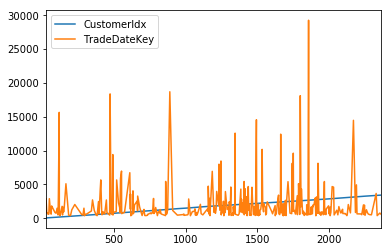

In [47]:
customers_freq = df_trade.groupby("CustomerIdx").count()["TradeDateKey"]
customers_freq = customers_freq.reset_index()
print(customers_freq.describe())
active_customers = customers_freq[customers_freq["TradeDateKey"] >= 352]
print(active_customers.plot())

In [48]:
start = time.clock()
data = []
customer_list = active_customers["CustomerIdx"].values
for customer in customer_list:
    single_cust_data = df_trade[df_trade["CustomerIdx"] == customer]
    data.append(single_cust_data)

print(len(data))
print("TIME TO PREPROCESS THE DATA: ", time.clock() - start)

385
TIME TO PREPROCESS THE DATA:  0.5269029999999972
